In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from pylab import imshow
import matplotlib.pyplot as plt

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# 训练样本: 容量55000， 每个元素为 784（28*28）图片
# 训练样本标签： One-Hot的标签，容量 55000， 标签维度为 10 （is 0-9）
print(mnist.train.images.shape, mnist.train.labels.shape)
# 测试样本: 容量10000， 每个元素为 784（28*28）图片
print(mnist.test.images.shape, mnist.test.labels.shape)
# 验证样本： 容量5000， 每个元素为 784 (28*28) 图片
print(mnist.validation.images.shape, mnist.validation.labels.shape)

(55000, 784) (55000, 10)
(10000, 784) (10000, 10)
(5000, 784) (5000, 10)


the image number is:  7


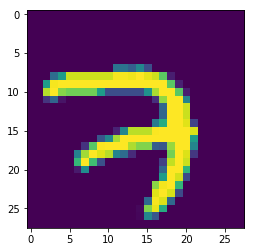

the image number is:  3


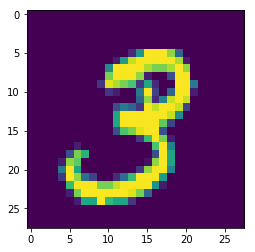

the image number is:  4


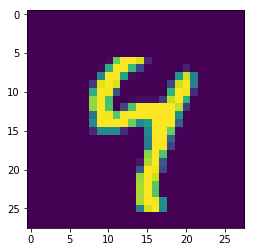

In [56]:
data = mnist.train.images
labels = mnist.train.labels
for i in range(0, 3):
    l = labels[i, ].argmax()
    imshow(data[i,].reshape(28, 28))
    print("the image number is: ", l)
    plt.show()

In [12]:
sess = tf.InteractiveSession()
x = tf.placeholder(dtype=tf.float32, shape=[None, 784], name="x") # None 表示 不限制
W = tf.Variable(tf.zeros([784, 10]), name="W")
b = tf.Variable(tf.zeros([1, 10]), name="b")

y = tf.nn.softmax(tf.matmul(x, W) + b)

# 定义损失函数， 这里用的是交叉熵（即对数损失）
y_ = tf.placeholder(dtype=tf.float32, shape=[None, 10], name="y_true") # y_:真实的标签

In [13]:
writer = tf.summary.FileWriter("F:/board/softmax", sess.graph)
writer.close()

In [14]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), axis=1))

In [16]:
# 定义参数学习器(梯度下降)， 并设定学习率为 0.5
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
# 全局参数初始化，此时变量数据（tf.Variable）才有初始值
tf.global_variables_initializer().run()   

In [17]:
# 分批次喂数据（SGD），如果一次性全部给数据则是 batch-GD
iter_num = 1000
batch_size = 100
for i in range(iter_num):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size=batch_size)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [18]:
# 定义预测准确率的计算方法
# 对应比较标签的准确性， 注意这里 y_仍然是 placeholder，需要喂数
correct_prediction = tf.equal(tf.argmax(input=y, axis=1), tf.argmax(input=y_, axis=1))
# 由于比较之后，对应每行为 bool， 因此为了统计计算准确数量， 需要 cast成 float
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [25]:
# 为了计算 acc，需要解决两个 placeholder：x 和 y_
output = acc.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
print(output)

0.9172


In [13]:
sess.close()